In [2]:
import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('used_cars_data.csv',index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [5]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [7]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [8]:
def convert(x):
    if not pd.isnull(x):
        try:
            return float(x.split()[0])
        except Exception:
            return np.nan
    else:
        return np.nan

In [9]:
df['Power']=df['Power'].apply(convert)
# df['Power'].apply(lambda x:str(x).split()[0])

In [10]:
df['Engine']=df['Engine'].apply(convert)

In [11]:
df['Mileage']=df['Mileage'].apply(convert)

In [12]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [13]:
#df['Mileage'] = pd.to_numeric(df['Mileage'].str.split().str.get(0),errors='coerce')

In [14]:
df['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [15]:
df['Transmission'].str.get_dummies()

,Automatic,Manual
S.No.,,
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7248,0,1
7249,1,0
7250,0,1


In [16]:
df['Manual'] = pd.get_dummies(df['Transmission'],drop_first=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manual
S.No.,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,1
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,0


In [17]:
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [18]:
df['Fuel_Type'].str.get_dummies()

,CNG,Diesel,Electric,LPG,Petrol
S.No.,,,,,
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
7248,0,1,0,0,0
7249,0,0,0,0,1
7250,0,1,0,0,0


In [19]:
df = pd.concat([df,df['Fuel_Type'].str.get_dummies()],axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Manual,CNG,Diesel,Electric,LPG,Petrol
S.No.,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,1,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,1,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,1,0,0,0,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,1,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,0,0,1,0,0,0


In [20]:
df['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [21]:
df = pd.concat([df,df['Owner_Type'].str.get_dummies()],axis=1)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,...,1,1,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,...,1,0,1,0,0,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,...,1,0,0,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,...,1,0,1,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,...,0,0,1,0,0,0,0,0,1,0


In [22]:
df['Owner_Type'].str.get_dummies()

,First,Fourth & Above,Second,Third
S.No.,,,,
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7248,1,0,0,0
7249,1,0,0,0
7250,1,0,0,0


In [23]:
del df['Transmission']


In [24]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,...,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,First,26.60,998.0,58.16,5.0,...,1,1,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,First,19.67,1582.0,126.20,5.0,...,1,0,1,0,0,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,First,18.20,1199.0,88.70,5.0,...,1,0,0,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,First,20.77,1248.0,88.76,7.0,...,1,0,1,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Second,15.20,1968.0,140.80,5.0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
df.drop(['Fuel_Type','Owner_Type','New_Price'],axis=1 , inplace=True)

In [26]:
df.head()

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manual,CNG,Diesel,Electric,LPG,Petrol,First,Fourth & Above,Second,Third
S.No.,,,,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,1,1,0,0,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,1,0,0,0,1,0,0,0
2,Honda Jazz V,Chennai,2011,46000,18.20,1199.0,88.70,5.0,4.50,1,0,0,0,0,1,1,0,0,0
3,Maruti Ertiga VDI,Chennai,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,1,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,0,0,0,0,0,1,0


In [27]:
df = pd.concat([df, pd.get_dummies(df['Location'])], axis = 1)
df.drop('Location',axis=1, inplace = True)

In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Mileage            5872 non-null   float64
 4   Engine             5872 non-null   float64
 5   Power              5872 non-null   float64
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Manual             5872 non-null   uint8  
 9   CNG                5872 non-null   int64  
 10  Diesel             5872 non-null   int64  
 11  Electric           5872 non-null   int64  
 12  LPG                5872 non-null   int64  
 13  Petrol             5872 non-null   int64  
 14  First              5872 non-null   int64  
 15  Fourth & Above     5872 non-null   int64  
 16  Second             5872 

In [30]:
df['Name'] = df['Name'].apply(lambda x:x.split()[0])
df = pd.concat([df, pd.get_dummies(df['Name'])],axis=1)
df.drop('Name',axis=1, inplace = True)

In [31]:
df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Manual,CNG,Diesel,...,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import seaborn as sns

In [33]:
# sns.pairplot(df, kind='reg')

Text(0, 0.5, 'KMs')

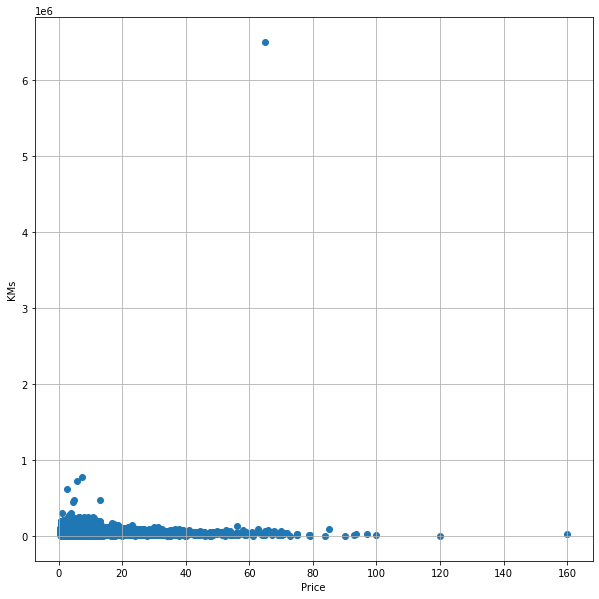

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price'],df['Kilometers_Driven'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('KMs')

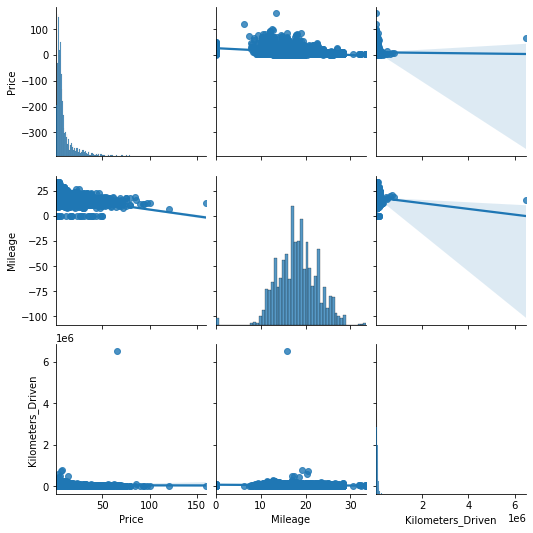

In [35]:
sns.pairplot(df[['Price','Mileage','Kilometers_Driven']], kind='reg')

Text(0, 0.5, 'Mileage')

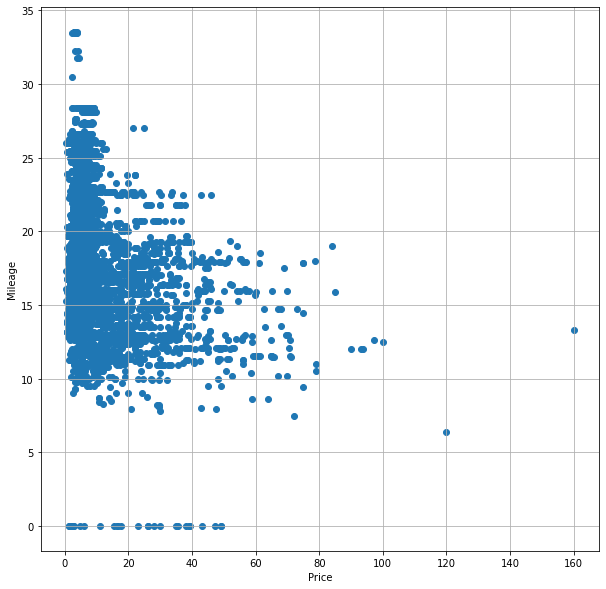

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price'],df['Mileage'])
plt.grid()
plt.xlabel('Price')
plt.ylabel('Mileage')

## Splitting the Data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.25, random_state = 101)

## 2. Creating the Machine Model and Training the model with Training Data

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression().fit(xtrain, ytrain)

## 4. Evaluation

In [41]:
#model.score(xtest, ytest)*100
print('%.1f%%'%(model.score(xtest,ytest)*100))

74.0%


In [42]:
ypred = model.predict(xtest)

In [43]:
ypred

array([12.40896648, 22.23299299, -0.45386719, ...,  7.0685769 ,
       28.0970766 , 24.81088371])

In [44]:
ytest

S.No.
1561    12.60
4551    17.27
4957     0.91
1674     7.80
269     10.00
        ...  
4343     0.85
4182     5.00
5580     6.50
1764    38.00
3277    23.80
Name: Price, Length: 1468, dtype: float64

In [45]:
from sklearn.metrics import mean_absolute_error

In [46]:
print(mean_absolute_error(ytest,ypred))

3.036815983263077


In [47]:
ypred[0]

12.40896647632053

In [48]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

24.47275515699149

## Conclusion : will not  use the model because it's accuracy less than 75%